# **Yulu - Hypothesis Testing**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### **Problem Statement:**

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands

### **Column Profiling:**

* datetime: datetime
* season: season (1: spring, 2: summer, 3: fall, 4: winter)
* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp: temperature in Celsius
* atemp: feeling temperature in Celsius
* humidity: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* count: count of total rental bikes including both casual and registered

### **Problem Approach**

* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
* Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
* Select an appropriate test to check whether:
    * Working Day has effect on number of electric cycles rented
    * No. of cycles rented similar or different in different seasons
    * No. of cycles rented similar or different in different weather
    * Weather is dependent on season (check between 2 predictor variable)
* Set up Null Hypothesis (H0)
* State the alternate hypothesis (H1)
* Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
    * Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
* Set a significance level (alpha)
* Calculate test Statistics.
* Decision to accept or reject null hypothesis.
* Inference from the analysis

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, chi2_contingency, f_oneway, chisquare, levene, shapiro, boxcox
%matplotlib inline
import os

In [3]:
df=pd.read_csv("yulu_bike.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# convert datetime column data type to datetime 
df["datetime"]=pd.to_datetime(df["datetime"],errors='coerce')
df["season"]=df["season"].astype(str)

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## **Univariate Analysis**

/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

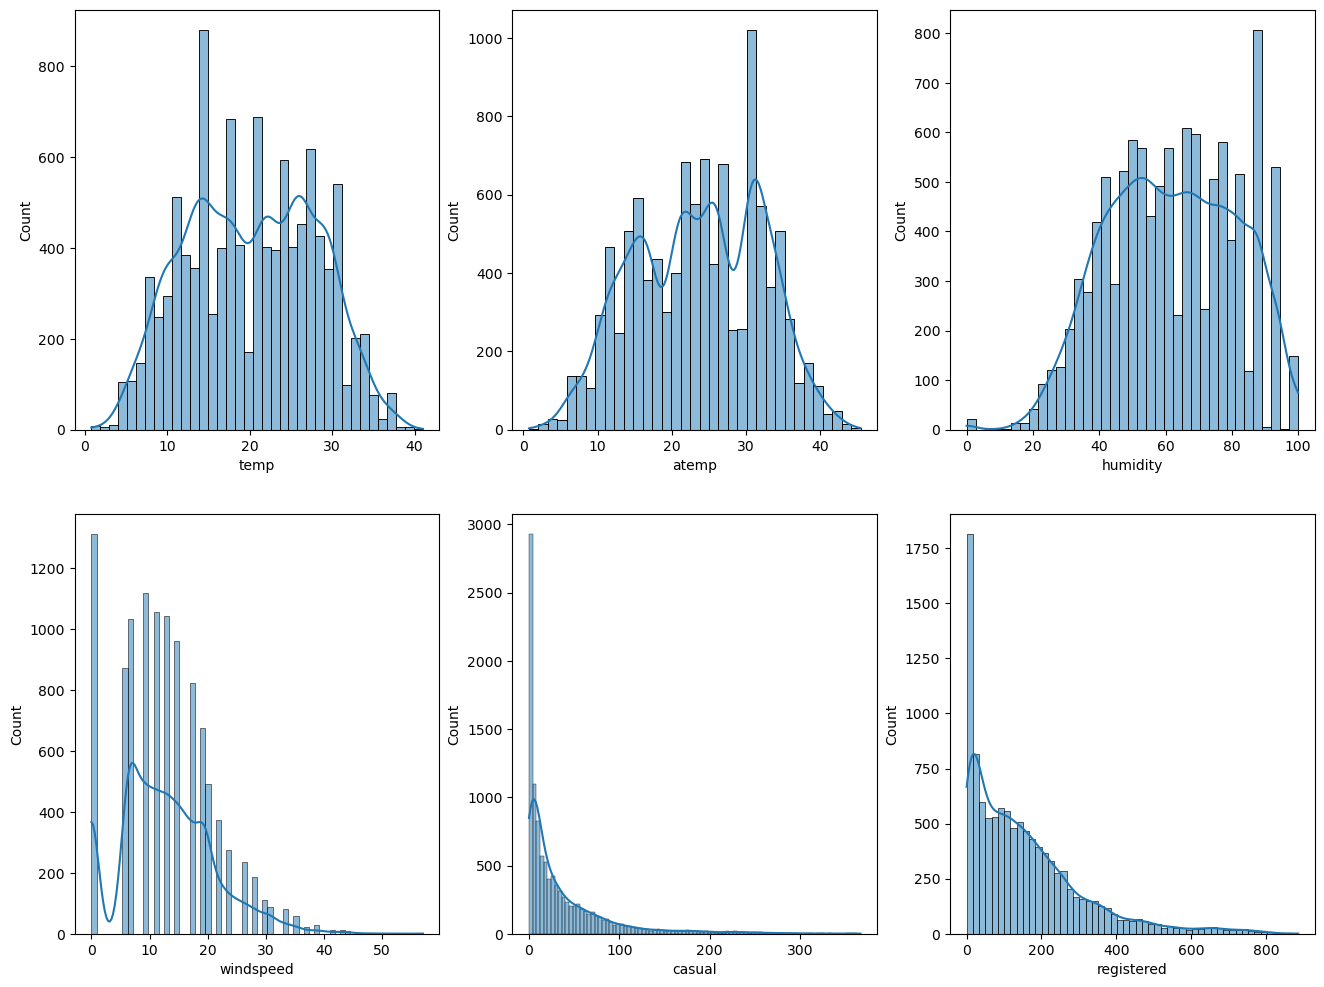

/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


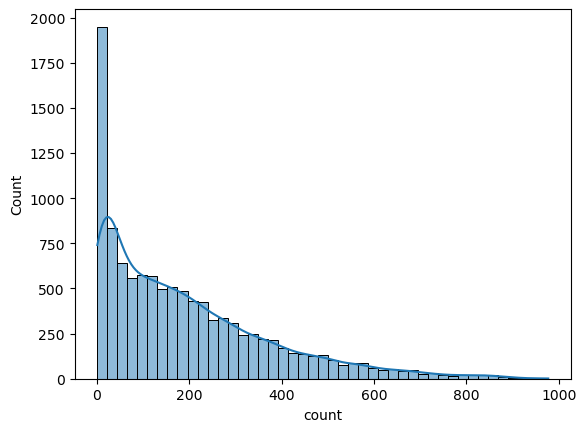

In [9]:
nume_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[nume_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[nume_cols[-1]], kde=True)
plt.show()

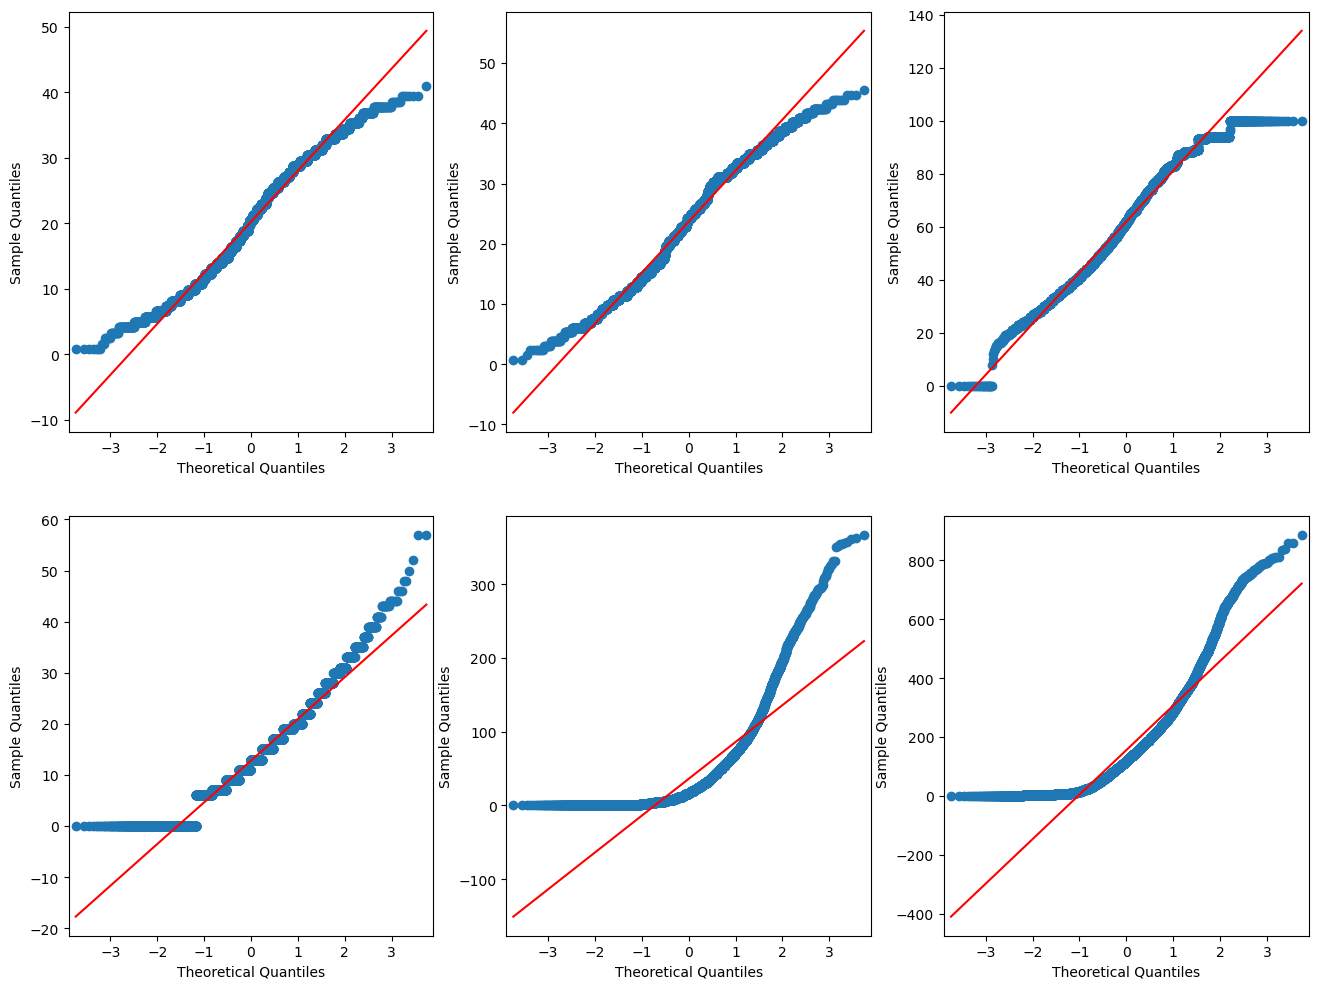

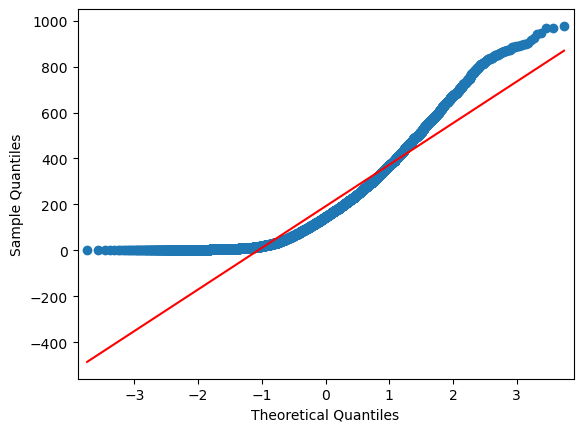

In [12]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        qqplot(df[nume_cols[index]], line="s", ax=axis[row, col])
        index += 1

qqplot(df[nume_cols[-1]], line = "s")
plt.show()

## **Plotting Categorical Variables againt count using Boxplots**

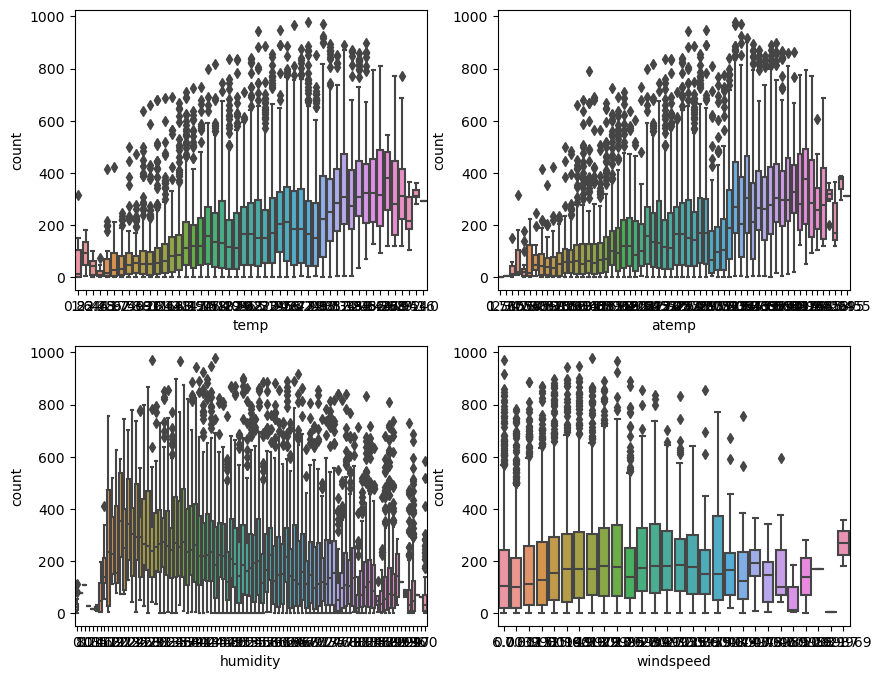

In [14]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=nume_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

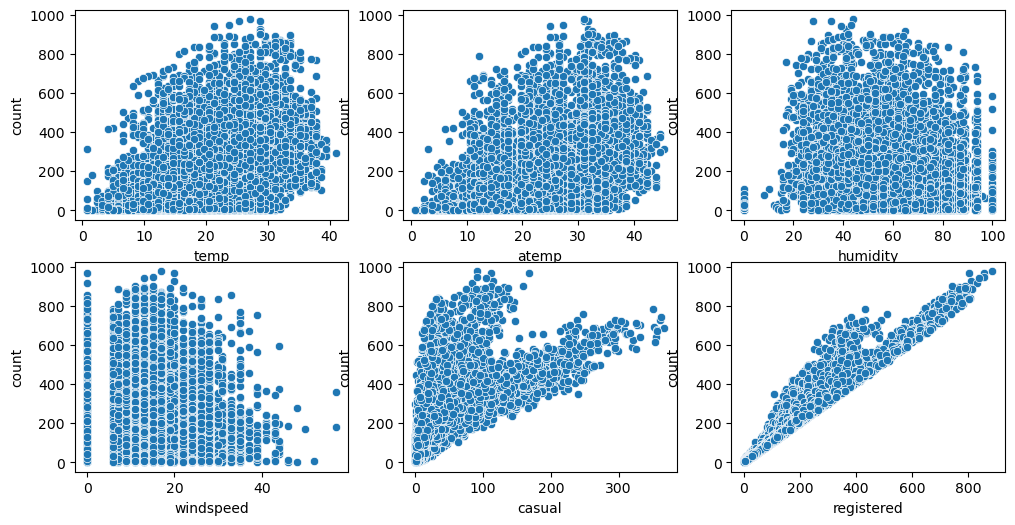

In [15]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=nume_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

## **Bivariate Analysis**

/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count')

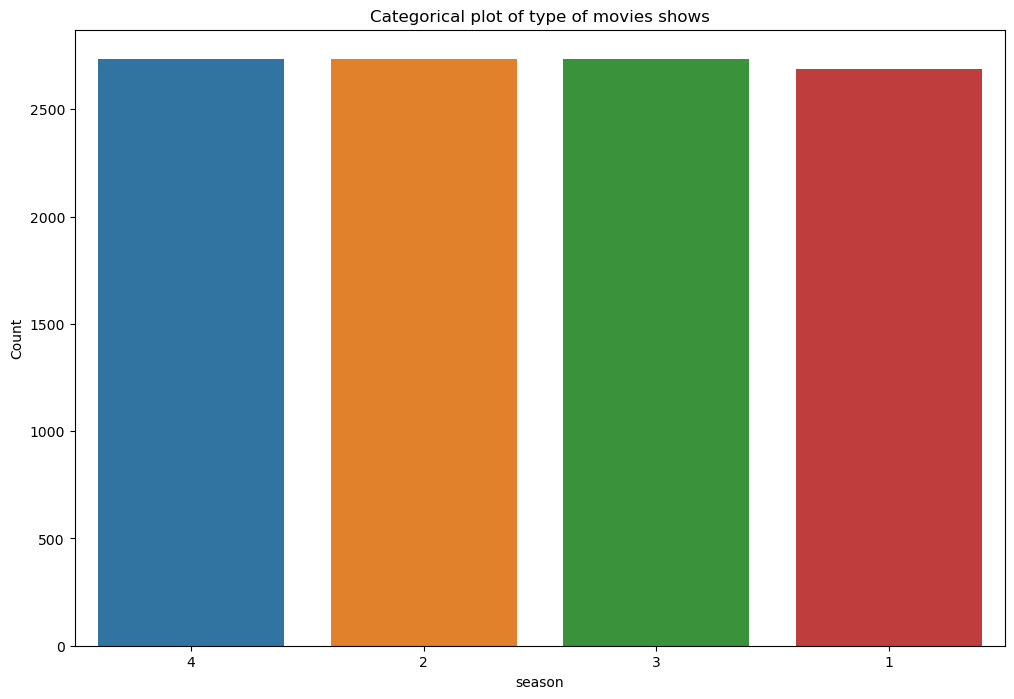

In [22]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, x='season', order=df['season'].value_counts().index, ax=axes)
axes.set_title("Categorical plot of type of movies shows")
axes.set_xlabel('season')
axes.set_ylabel('Count')
# axes.tick_params(axis='x', rotation=45)

/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

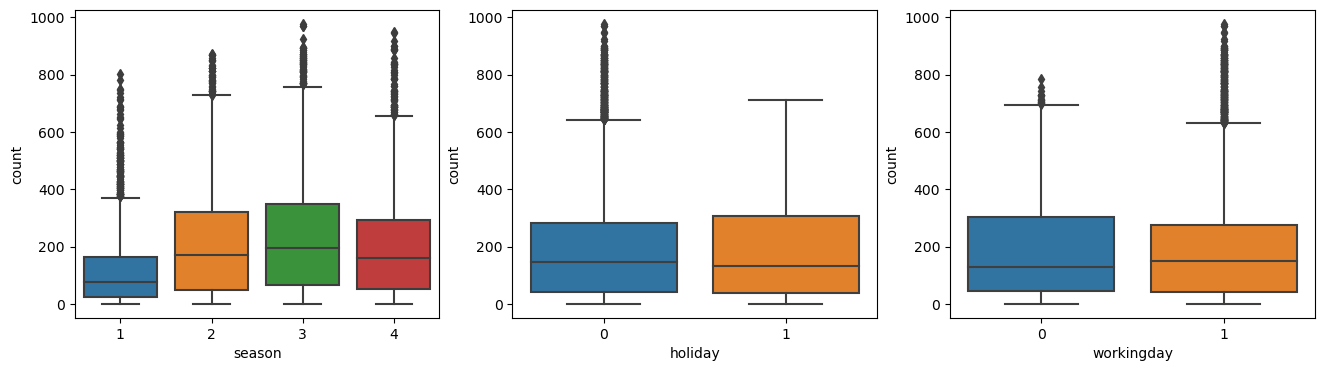

In [70]:
plt.figure(figsize=(16,4),dpi=100)
plt.subplot(1,3,1)
ax=plt.gca()
sns.boxplot(data=df,x="season",y="count")
plt.subplot(1,3,2)
sns.boxplot(data=df,x="holiday",y="count")
plt.subplot(1,3,3)
sns.boxplot(data=df,x="workingday",y="count")
plt.show()

/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rently/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

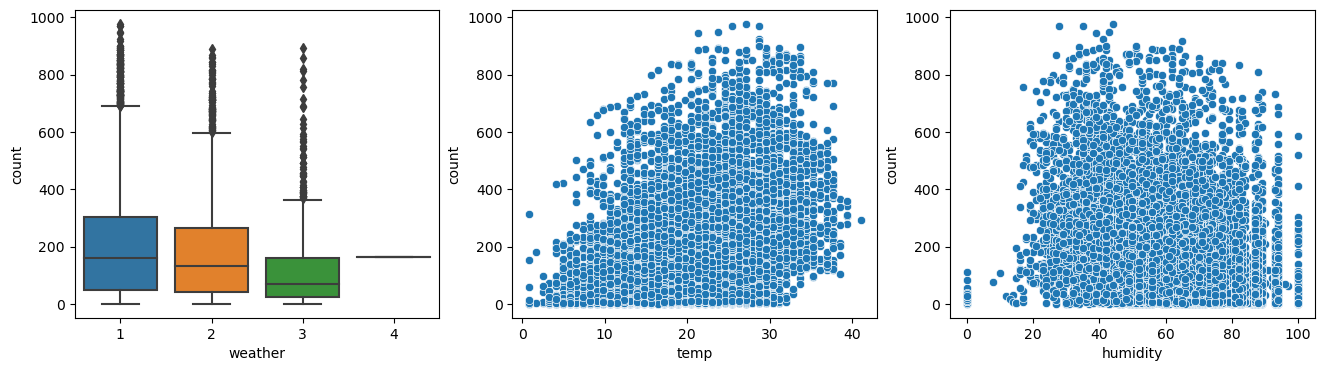

In [74]:
plt.figure(figsize=(16,4),dpi=100)
plt.subplot(1,3,1)
sns.boxplot(data=df,x="weather",y="count")
plt.subplot(1,3,2)
sns.scatterplot(data=df,x="temp",y="count")
plt.subplot(1,3,3)
sns.scatterplot(data=df,x="humidity",y="count")
plt.show()

## **Hypothesis Testing**

### **To check whether working day has effect on the number of electric cycles rented with 99% confidence Interval**

In [45]:
days_group_count=df.groupby(pd.Grouper(key='datetime', freq='D'))["count"].sum()
Tot_Avg=days_group_count.mean()
Tot_Avg

2900.5229485396385

In [47]:
working_day_0=df.loc[df["workingday"]==0].reset_index()
working_day_0_count=working_day_0.groupby(pd.Grouper(key='datetime', freq='D'))["count"].sum()
mu1=working_day_0_count.mean()
mu1

914.6256983240223

In [48]:
working_day_1=df[df["workingday"]==1]
working_day_1_count=working_day_1.groupby(pd.Grouper(key='datetime', freq='D'))["count"].sum()
mu2=working_day_1_count.mean()
mu2

1995.26359832636

In [49]:
type(working_day_1_count)

pandas.core.series.Series

From the Above data, we got 2 independent Average of count data, 

1. mu1 - Average of total rental bikes on non-working days.
2. mu2 - Average of total rental bikes on working days.

Here our Null Hypothesis and Alternate Hypothesis be:

Ho : mu1 = mu2

Ha : mu2 != mu1 (since we want to test that working days have effect over total rental bikes.)

In [62]:
test_statistic,p_value=ttest_ind(working_day_0_count,working_day_1_count,alternative="two-sided")

In [63]:
alpha=0.01
print(test_statistic)
print(p_value)
if p_value<alpha:
    print("The working days has effect on electric cycles rented. Hence Reject Ho:")
else:
    print("The working days has no effect on electric cycles rented. Hence Failed to Reject Ho:")
          

-8.832875607392745
2.923144655994148e-18
The working days has effect on electric cycles rented. Hence Reject Ho:


So From the above data we can statistically prove that working days has effect on the count of rental bikes.

### **To check whether working day has effect on the number of electric cycles rented with 99% confidence Interval**

In [64]:
alpha=0.05
print(test_statistic)
print(p_value)
if p_value<alpha:
    print("The working days has effect on electric cycles rented. Hence Reject Ho:")
else:
    print("The working days has no effect on electric cycles rented. Hence Failed to Reject Ho:")

-8.832875607392745
2.923144655994148e-18
The working days has effect on electric cycles rented. Hence Reject Ho:


Now, Let's check the effect of working days vs non-working days on the rental bikes count individually.

### **working days effect on rental bikes individually**

From the above data our total Average count of rental bikes inclusive of both working days and non-working days is 2900.5229485396385

Here our Null Hypothesis and Alternate Hypothesis be:

Ho : mu2 = 2900.5229485396385

Ha : mu2 > 2900.5229485396385 (since we want to test that working days individually have effect over total rental bikes).

In [69]:
test_statistic,p_value=ttest_1samp(working_day_0_count,2900,alternative="less")
alpha=0.01
print(test_statistic)
print(p_value)
if p_value<alpha:
    print("The working days has effect on electric cycles rented. Hence Reject Ho:")
else:
    print("The working days has no effect on electric cycles rented. Hence Failed to Reject Ho:")

-26.33408028116926
1.1546856432731977e-107
The working days has effect on electric cycles rented. Hence Reject Ho:


### **Non-working days effect on rental bikes individually**

From the above data our total Average count of rental bikes inclusive of both working days and non-working days is 2900.5229485396385.

For non-working days, our Null Hypothesis and Alternate Hypothesis be:

Ho : mu2 = 2900.5229485396385

Ha : mu2 < 2900.5229485396385 (since we want to test that working days individually have effect over total rental bikes).

In [70]:
test_statistic,p_value=ttest_1samp(working_day_1_count,2900,alternative="less")
alpha=0.05
print(test_statistic)
print(p_value)
if p_value<alpha:
    print("The working days has effect on electric cycles rented. Hence Reject Ho:")
else:
    print("The working days has no effect on electric cycles rented. Hence Failed to Reject Ho:")

-9.392403307712268
3.8337706362403393e-20
The working days has effect on electric cycles rented. Hence Reject Ho:


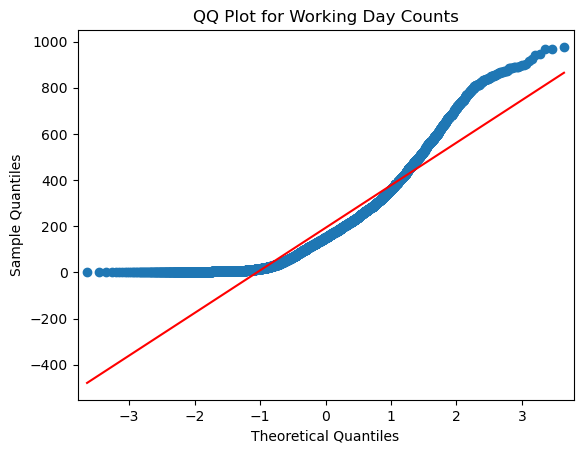

In [17]:
working_day_counts = df.loc[df['workingday'] == 1]['count']


sm.qqplot(working_day_counts, dist=stats.norm, line='s')


plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('QQ Plot for Working Day Counts')


plt.show()

## **ANOVA Test**

In [27]:
from statsmodels.graphics.gofplots import qqplot
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values
groups=[gp1,gp2,gp3,gp4,gp5,gp6,gp7,gp8]

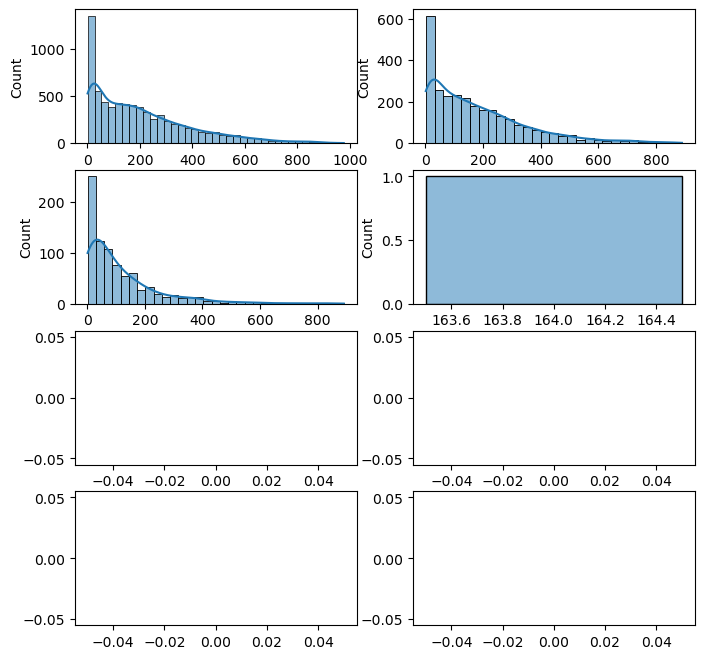

In [21]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))

index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index], ax=axis[row, col], kde=True)
        index += 1

plt.show()

In [23]:
val = pd.crosstab(index = df["weather"], columns = df["season"])
print(val)
chisquare(val)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


Power_divergenceResult(statistic=array([2749.33581534, 2821.39590194, 3310.63995609, 2531.07388442]), pvalue=array([0., 0., 0., 0.]))

### **Insights and Recommendation:**

* As we can see he pvalue is very very very low and we are Rejecting Null Hypothesis becasue we see weather 4 having rent count negligible and clear and lightsnow have good number of bikes rented. So it does impact and not all similar.

* A 2-sample T-test on working and non-working days with respect to count,implies that the mean population count of both categories are the same.

* An ANOVA test on different seasons with respect to count,implies that population count means under different seasons are not the same, meaning there is a difference in the usage of Yulu bikes in different seasons.

* By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.

* By performing a Chi2 test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.

* The maximum number of holidays can be seen during the fall and winter seasons.

* There is a positive co-relation between counts and temperature.

* There is a negative co-relation between counts and humidity.


* As casual users are very less Yulu should focus on marketing startegy to bring more customers. for eg. first time user discount, friends and family discounts, referral bonuses etc.

* On non working days as count is very low Yulu can think on the promotional activities like city exploration competition, some health campaigns etc.